In [1]:
# Importing libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sklearn as skl


# Defining functions

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [2]:
def create_X(x, y, n ):   ## Hvorfor denne formen?
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)      # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

def linreg(x, y, n):
    X = create_X(x, y, n)
    z = FrankeFunction(x, y)

    # Solving for beta
    beta = np.linalg.inv(X.T @ X) @ X.T @ z
    return beta

In [3]:
# Generating data
N = 1000
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

# Fit an n-degree polynomial
n = 5
beta = linreg(x, y, n)

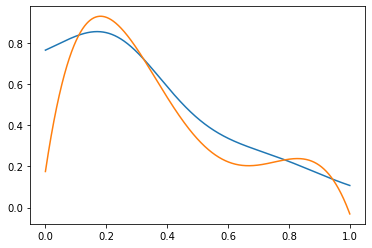

In [4]:
x0 = np.linspace(0, 1, 100001)
z0 = FrankeFunction(x0, 0)
z0_tilde = create_X(x0, 0, n) @ beta
plt.plot(x0, z0)
plt.plot(x0, z0_tilde)



In [5]:
z = FrankeFunction(x, y)
z_tilde = create_X(x, y, n) @ beta
print(MSE(z, z_tilde))

0.0018922999880326469


In [20]:
def bootstrap_2d_lin(x, y, B, deg):
    """Returns estimated distributions of beta estimators."""
    t = np.zeros(B)
    n_datapoints = len(x)
    
    beta = linreg(x, y, deg)
    
    distribution = np.zeros((len(beta), B))
    for b in range(B):
        datapoints = np.random.randint(0,n_datapoints,n_datapoints)
        x_b = x[datapoints]
        y_b = y[datapoints]
        beta_b = linreg(x_b, y_b, deg)
        distribution[:, b] = beta_b
    return distribution

In [21]:
distribution = bootstrap_2d_lin(x, y, 1000, 5)


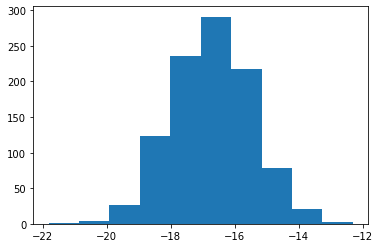

In [29]:
# Plots estimated distribution for the i'th parameter of the model
i = 20
plt.hist(distribution[i, :])
plt.show()